<a href="https://colab.research.google.com/github/hrushikeshsahu19/ML_algorithm_custom_code/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Convergence reached at iteration 10
Final Centroids: [[-6.96154428 -6.00375829]
 [-6.78329313 -7.62164091]
 [ 1.09532326  5.5245225 ]]


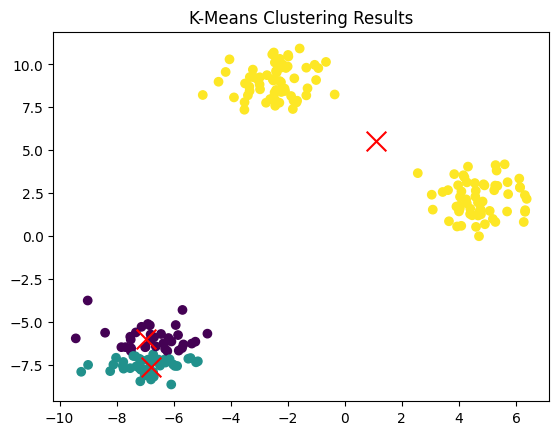

In [1]:
import numpy as np

class KMeans:
    def __init__(self, n_clusters=3, max_iters=1000, tolerance=1e-4):
        self.n_clusters = n_clusters  # Number of clusters
        self.max_iters = max_iters    # Maximum number of iterations
        self.tolerance = tolerance    # Convergence tolerance
        self.centroids = None         # Centroids of the clusters

    def fit(self, X):
        """
        Fit the K-Means clustering model to the data.

        Parameters:
        X (numpy.ndarray): Feature matrix of shape (n_samples, n_features).
        """
        n_samples, n_features = X.shape
        # Initialize centroids by randomly selecting points from the data
        random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        for iteration in range(self.max_iters):
            # Step 1: Assign clusters
            clusters = self._assign_clusters(X)

            # Step 2: Calculate new centroids
            new_centroids = self._compute_centroids(X, clusters)

            # Step 3: Check for convergence (if centroids don't change)
            if np.all(np.abs(new_centroids - self.centroids) <= self.tolerance):
                print(f"Convergence reached at iteration {iteration + 1}")
                break

            # Update centroids
            self.centroids = new_centroids

            # Optionally, print the centroids during training
            if (iteration + 1) % 100 == 0:
                print(f"Iteration {iteration + 1}: Centroids:\n{self.centroids}")

    def _assign_clusters(self, X):
        """
        Assign each data point to the nearest centroid.

        Parameters:
        X (numpy.ndarray): Feature matrix of shape (n_samples, n_features).

        Returns:
        numpy.ndarray: Array of cluster indices assigned to each sample.
        """
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)  # Compute distance to each centroid
        return np.argmin(distances, axis=1)

    def _compute_centroids(self, X, clusters):
        """
        Compute new centroids as the mean of the points assigned to each cluster.

        Parameters:
        X (numpy.ndarray): Feature matrix of shape (n_samples, n_features).
        clusters (numpy.ndarray): Array of cluster indices assigned to each sample.

        Returns:
        numpy.ndarray: New centroids.
        """
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            centroids[i] = np.mean(X[clusters == i], axis=0)  # Mean of points in the cluster
        return centroids

    def predict(self, X):
        """
        Predict the closest cluster for each data point.

        Parameters:
        X (numpy.ndarray): Feature matrix of shape (n_samples, n_features).

        Returns:
        numpy.ndarray: Cluster indices assigned to each sample.
        """
        clusters = self._assign_clusters(X)
        return clusters

# Example usage
if __name__ == "__main__":
    from sklearn.datasets import make_blobs
    from sklearn.model_selection import train_test_split

    # Generate synthetic dataset for clustering
    X, _ = make_blobs(n_samples=1000, n_features=2, centers=3, random_state=42)

    # Split into training and testing sets (though clustering doesn't require labels)
    X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

    # Train the K-Means model
    model = KMeans(n_clusters=3, max_iters=1000)
    model.fit(X_train)

    # Print final centroids
    print("Final Centroids:", model.centroids)

    # Make predictions on test data
    predictions = model.predict(X_test)

    # Visualize the results (optional)
    import matplotlib.pyplot as plt

    plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap='viridis')
    plt.scatter(model.centroids[:, 0], model.centroids[:, 1], color='red', marker='x', s=200)
    plt.title('K-Means Clustering Results')
    plt.show()
